# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [74]:
#Import applicable libraries
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.mlab as mlab
from scipy.stats import norm
import scipy.stats
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline


#read in files
df = pd.read_csv('data/human_body_temperature.csv')

### Q1: Is the distribution of body temperatures normal?

In [75]:
df.head()
len(df)
df.describe()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


130

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Let's plot the data on a histogram to visually see if the data follows a normal distribution

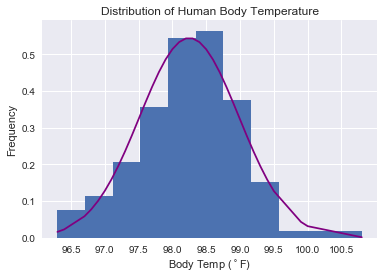

In [76]:
htemp = df.temperature.sort_values()
mu, std = htemp.mean(),htemp.std()
p=norm.pdf(htemp,mu,std)

#bin size using sqrt rule: sqrt of #obs
nbins = int(np.sqrt(len(df['temperature'])))

plt.xlabel('Body Temp ($^\circ$F)')
plt.ylabel('Frequency')
xticks = plt.xticks(np.arange(94.5,101,.5))
plt.title('Distribution of Human Body Temperature')

n,bins,patches= plt.hist(htemp,bins=nbins,normed=True,stacked=True)
plt.plot(htemp, p, color='purple')
plt.show()

In [77]:
#the p-value is > 0.05 via the normal test, accepting the data is normally distributed
print(scipy.stats.normaltest(htemp))

NormaltestResult(statistic=2.703801433319236, pvalue=0.2587479863488212)


Question 1 answer: Both the histogram/pdf visualization and the normality test conclude the data is normally distributed

### Question 2: Is the sample size large? Are the observations independent?

The sample size is large enough given n > 30 @ n = 130 which is needed to apply CLT. Each random variable in this sample and population measures the temperature of a human and __ * are independent observations * __


### Question 3: Is the true population mean really 98.6 degrees F? Would you use a one-sample or two-sample test?

The objective of this exercise is to compare the mean of the given sample with the generally accepted human body temperature of 98.6 degrees. We need to use a one sample test.

In [78]:
### Question 3 cont: In this situation, is it appropriate to use the  tt  or  zz  statistic? Now try using the other test. How is the result be different? Why?

To check if the true population mean is really 98.6 degrees F, we have to compare if the sample mean lies within statistically insignficant range of population mean. The hypothesis test is

$H$<sub>o</sub> : Population mean = Sample mean

$H$<sub>a</sub> : Population mean &ne; Sample mean


In this case 

* the sample observations follow a Normal distribution
* the sample size _**n**_ is large
* we do not know the population standard deviation(**&sigma;**) .

so, **_we will use a $t$ statistic_**

In [79]:
#Calculate the t statistic using ttest_1samp from scipy.stats
scipy.stats.ttest_1samp(htemp,98.6)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

The two-tailed critical $t$ value for a 95% CI and 129 degrees of freedom is approxiametely: 1.980. From the above we see that the $t$ value calclated (**-5.455**) for this sample is beyond the critical $t$ value of -1.980. The $p$ value of this is `2.4106320415610081e-07`

Hence, we fail to reject the null hypothesis. So, we can conclude that the generally accepted average human body temperature is most probably incorrect.


### Question 3 cont: Now try using the other test. How is the result be different? Why?

In [80]:
#the z statistic is
(htemp.mean()-98.6) / (htemp.std()/math.sqrt(130))

-5.454823292364301

The critical $z$ statistic or, the $z$ statistic for a 95% CI (two tailed) is 1.96. If the calculated $z$ is greater than this, then we can reject $H$<sub>o</sub>

### Question 5: Is there a significant difference between males and females in normal temperature?

In [81]:
# Check the above calc using scipy.stats.norm.interval method
scipy.stats.norm.interval(0.95,htemp.mean(),scipy.stats.sem(htemp))

(98.12319642818164, 98.37526511027988)

From the above calculations, anyone whose body temperature is outside the range (98.12, 98.37) can be considered not to be with normal body temperature_

### Question 6: Is there a significant difference between males and females in normal temperature?

In [82]:
len(df[df.gender=='F'])

65

In [83]:
len(df[df.gender=='M'])

65

In [84]:
df_mpop = df[df.gender=='M']
df_mpop.head()
df_fpop = df[df.gender=='F']
df_fpop.head()
mtemp_obs = df_mpop.temperature;ftemp_obs = df_fpop.temperature
mtemp_obs.head(),ftemp_obs.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


(2     97.8
 5     99.2
 6     98.0
 7     98.8
 12    98.2
 Name: temperature, dtype: float64, 0    99.3
 1    98.4
 3    99.2
 4    98.0
 8    98.4
 Name: temperature, dtype: float64)

Use a ** Two Sample t test Hypothesis** to check if the there is a significant difference in the normal temperature between male and female. Steps: 
  
  1. Setup the $H$<sub>o</sub> - in this case, it will be Sample Mean<sub>male</sub> = Sample Mean<sub>f</sub>
  2. Find the mean of the two samples and their difference
  3. Find the $Standard  Error$ of the distribution of the differencec in means of these two sample populations
  4. Check if the difference in means lies outside the critical value for 95% Confidence Interval; if it does, the null hypothesis can be rejected

In [85]:
#mean of both the samples and their difference - (98.1046153846154, 98.39384615384613, 0.289230769230727)
mtemp_obs.mean(),ftemp_obs.mean(),ftemp_obs.mean()-mtemp_obs.mean()

(98.1046153846154, 98.39384615384613, 0.289230769230727)

In [86]:
#Standard deviation of both samples - (0.7434877527313665, 0.6987557623265908)
ftemp_obs.std(),mtemp_obs.std()

(0.7434877527313665, 0.6987557623265908)

In [87]:
#the standard deviation of the distribution of the difference in these two population; 
#since we dont know the population variance, we use sample variance as an estimate of the population variance
#margin of error is
math.sqrt(mtemp_obs.var()+ftemp_obs.var())

1.0203105673500361

The two-tailed critical $t$ value for a 95% CI and 127 degrees of freedom is approx. 1.980; if the difference in mean is above the $Standard Error$, i.e. ** critical $t$ value $*$ Margin of Error **then we can reject $H$<sub>o</sub>


In [88]:
#find the temp difference at the critical t value
1.980*(math.sqrt(mtemp_obs.var()+ftemp_obs.var())/math.sqrt(65))

0.25057682183125635

_From the above calc, the observed difference is greater than the 95% Confidence Interval, therefore, the $H$<sub>o</sub> can be rejected. So there is significant difference between male and female body temperature_

In [89]:
# Check with scipy.stats.ttest_ind 
scipy.stats.ttest_ind(ftemp_obs,mtemp_obs)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)